In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape
from keras.preprocessing.image import ImageDataGenerator	

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data="/content/drive/MyDrive/AI_final/"

In [4]:
x,y=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                
                pixel=load_img(data  + folder +"/" + file,target_size=(200,200))
                pixel=img_to_array(pixel)
                x.append(pixel)
                y.append( folder)

x =asarray(x)
y =asarray(y)

Folder= bicycle
Folder= airplane
Folder= motorbike
Folder= bus
Folder= truck


In [5]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
y = encoder.fit_transform(y)


file = open('pix.data', 'wb')

pickle.dump((x,y), file)

file.close()

In [6]:
def load_data():
    file = open('pix.data', 'rb')
    
    (x, y) = pickle.load(file)
    
    file.close()
    return x, y


X,y = load_data()

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)


X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

(2161, 5)


In [14]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 
epochs=   30  
classes=5   

#tao model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [15]:
test_loss,test_acc = model.evaluate(X_train,y_train)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

68/68 [==============================] - 2s 25ms/step - loss: 8.8232e-05 - accuracy: 1.0000
độ chính xác trên tập kiểm tra 1.0
hàm mất mát trên tập kiểm ta 8.823155076242983e-05


In [16]:
model.save('/content/drive/MyDrive/AI_final/vehicle_classification.h5')

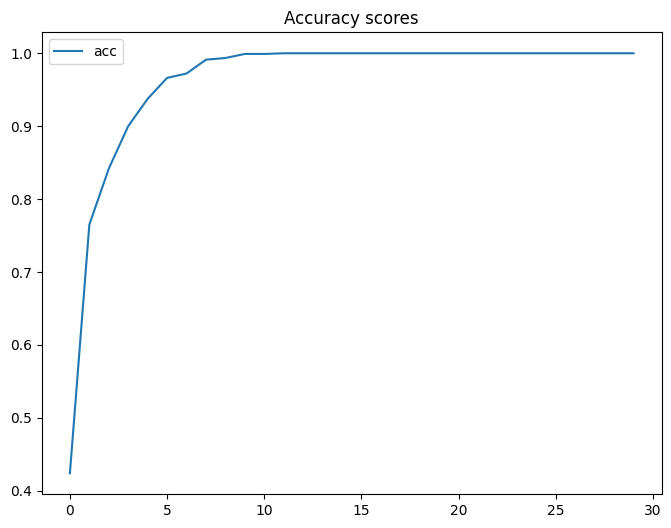

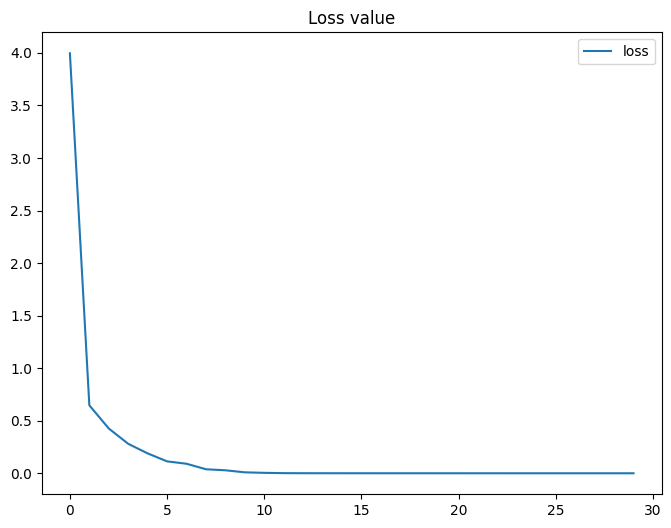

In [17]:
import matplotlib.pyplot as plt      
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(train.history['accuracy'])
plt.legend(['acc'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(train.history['loss'])
plt.legend(['loss'])
plt.show()

1/1 [==============================] - 1s 797ms/step
This is:  airplane [1.0000000e+00 6.5067384e-20 1.4273489e-13 1.3492194e-15 1.8922233e-15]
reliability: 100.0 %


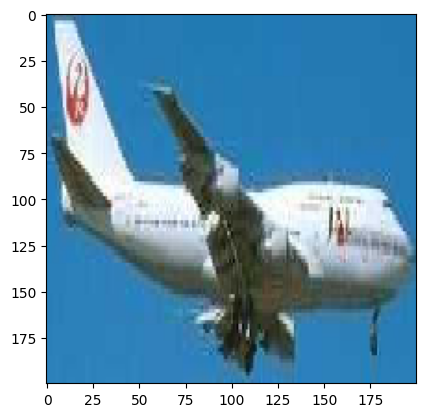

In [18]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/AI_final/vehicle_classification.h5")

import numpy as np
class_name = ['airplane','bicycle','bus','motorbike','truck']

img = load_img('/content/drive/MyDrive/AI_final/airplane/00CO4VX9TE78.jpg',target_size=(200,200))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,200, 200, 3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')

1/1 [==============================] - 0s 86ms/step
This is:  bicycle [6.4649570e-18 1.0000000e+00 5.9896497e-12 3.0009644e-16 3.0183382e-14]
reliability: 100.0 %


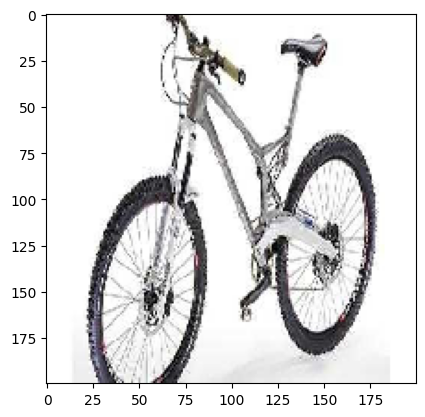

In [19]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/AI_final/vehicle_classification.h5")

import numpy as np
class_name = ['airplane','bicycle','bus','motorbike','truck']

img = load_img('/content/drive/MyDrive/AI_final/bicycle/0NTXXZNWRLJM.jpg',target_size=(200,200))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,200, 200, 3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')

1/1 [==============================] - 0s 77ms/step
This is:  motorbike [4.2306970e-06 9.6809075e-05 8.3138076e-07 9.9989641e-01 1.7135264e-06]
reliability: 99.98964071273804 %


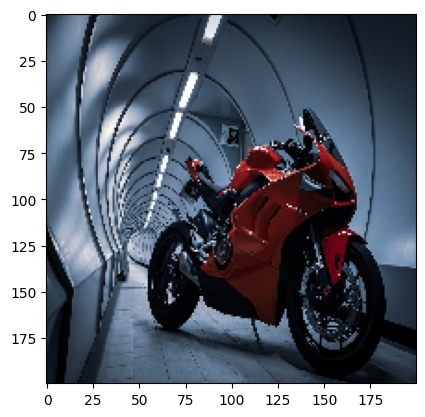

In [20]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/AI_final/vehicle_classification.h5")

import numpy as np
class_name = ['airplane','bicycle','bus','motorbike','truck']

img = load_img('/content/photo-1615172282427-9a57ef2d142e.jpg',target_size=(200,200))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,200, 200, 3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')

1/1 [==============================] - 0s 84ms/step
This is:  truck [2.2181691e-01 1.5942524e-01 2.6593995e-04 2.6518549e-04 6.1822671e-01]
reliability: 61.822670698165894 %


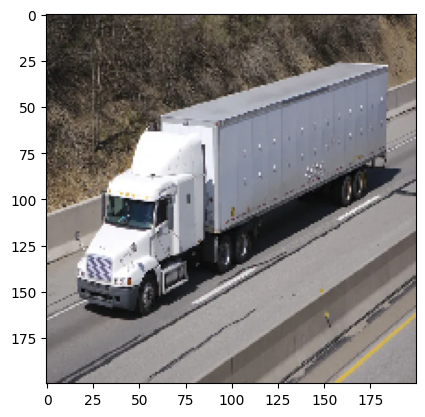

In [21]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/AI_final/vehicle_classification.h5")

import numpy as np
class_name = ['airplane','bicycle','bus','motorbike','truck']

img = load_img('/content/semi-semitrailer-truck-tractor-highway.webp',target_size=(200,200))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,200, 200, 3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')

1/1 [==============================] - 0s 78ms/step
This is:  bus [3.5589999e-15 1.0022357e-08 9.9995983e-01 5.4516124e-11 4.0198829e-05]
reliability: 99.99598264694214 %


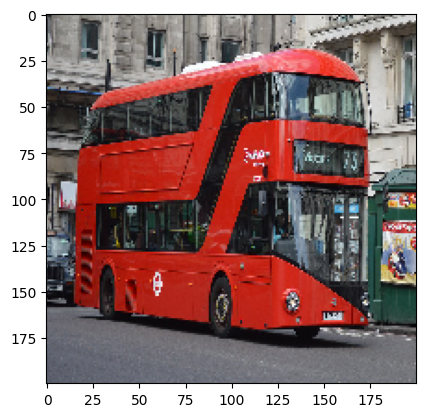

In [22]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/AI_final/vehicle_classification.h5")

import numpy as np
class_name = ['airplane','bicycle','bus','motorbike','truck']

img = load_img('/content/LT_471_(LTZ_1471)_Arriva_London_New_Routemaster_(19522859218).jpg',target_size=(200,200))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,200, 200, 3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')